In [34]:
%matplotlib inline
from pylab import *

In [35]:
from PIL import Image
from glob import glob
from random import choice

In [36]:
import process_images_hdf5 as pi5

In [37]:
def gaussian2d(x,y,x0,y0,sigma):
    r2=(x-x0)**2+(y-y0)**2
    return exp(-r2/2/sigma**2)

def circle(x,y,x0,y0,r):
    r2=(x-x0)**2+(y-y0)**2
    return r2<r**2


from scipy.signal import convolve2d

def randbetween(low,high):
    return rand()*(high-low)+low


In [38]:
def deg2pixel(D):
    # the bbsk images are angular size 60 degrees x 40 degrees
    # the raw images are resized so that 
    #   5.5 pixels ~ 0.5 degrees (cat retina)  - default

    P=D/.5*5.5
    return P

def pixel2deg(P):
    D=P/5.5*0.5
    return D

In [39]:
def make_mask(fsig=35,g=None):
    # original size 600x800
    # logged dog is 495 x 660 (old version of masks)
    # the bbsk images are angular size 60 degrees x 40 degrees
    # the raw images are resized so that 
    #   5.5 pixels ~ 0.5 degrees (cat retina)  - default
    
    mx,my=800,600
    x,y=meshgrid(arange(mx),arange(my))
    
    if g is None:
        g=0


        blob_deg_min=3
        blob_deg_max=14
        for i in range(10):
            g=g+circle(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))

        #    g=g+gaussian2d(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))>.5
        g=g>0


    f=gaussian2d(x,y,mx//2,my//2,fsig)
    f=f[(my//2-200):(my//2+200),(mx//2-200):(mx//2+200)]

    #f=f[(my//2-3*fsig):(my//2+3*fsig),(mx//2-3*fsig):(mx//2+3*fsig)]
    
    res=convolve2d(g,f,mode='same')
    res=res/res.max()
    
    return res

In [40]:
import os

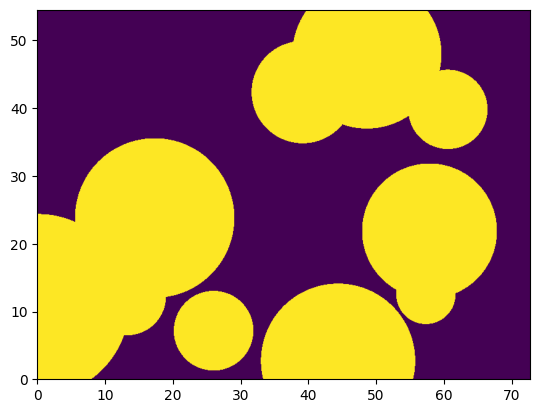

In [41]:
if os.path.exists('2024-05-11 Making Masks g.npy'):
    g=np.load('2024-05-11 Making Masks g.npy')
else:
    #mx,my=1200,700
    mx,my=800,600
    x,y=meshgrid(arange(mx),arange(my))
    g=0
    
    blob_deg_min=3
    blob_deg_max=14
    for i in range(10):
        g=g+circle(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))
        
    #    g=g+gaussian2d(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))>.5
    g=g>0
    np.save('2024-05-11 Making Masks g.npy',g)

imshow(g,extent=[0,pixel2deg(mx),0,pixel2deg(my)])


In [42]:
fsig=20 # pixels
f=gaussian2d(x,y,mx//2,my//2,fsig)
#f=f[(my//2-3*fsig):(my//2+3*fsig),(mx//2-3*fsig):(mx//2+3*fsig)]
f=f[(my//2-200):(my//2+200),(mx//2-200):(mx//2+200)]



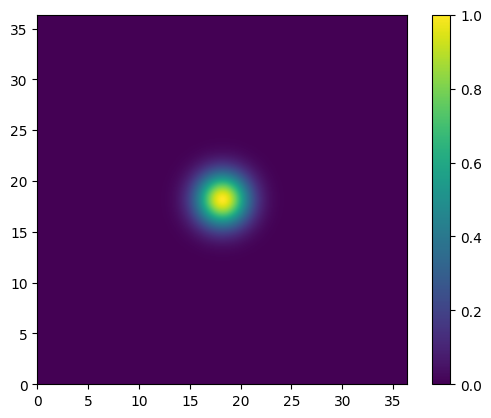

In [43]:
imshow(f,extent=[0,pixel2deg(f.shape[1]),0,pixel2deg(f.shape[0])])
colorbar()

In [44]:
%%time
res=convolve2d(g,f,mode='same')
res=res/res.max()

CPU times: user 1min 45s, sys: 376 ms, total: 1min 46s
Wall time: 1min 46s


In [45]:
pixel2deg(35)

3.1818181818181817

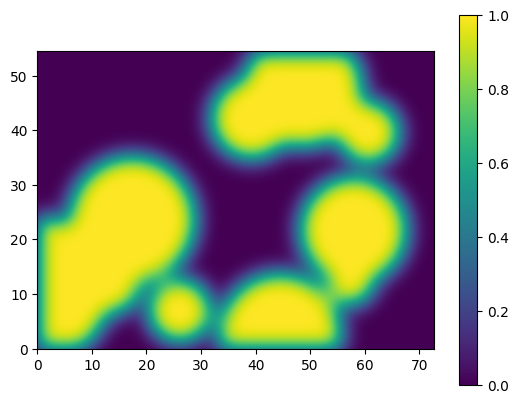

In [46]:
imshow(res,extent=[0,pixel2deg(res.shape[1]),0,pixel2deg(res.shape[0])])
colorbar()

1.8181818181818181

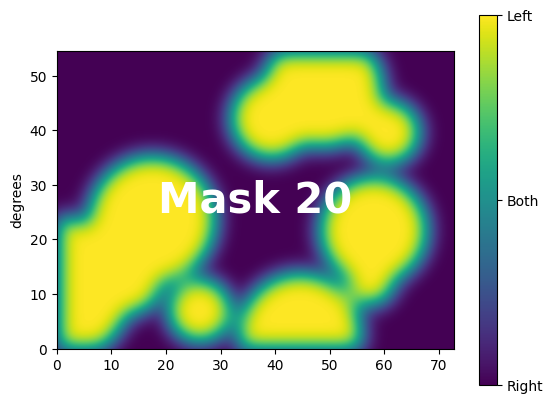

In [47]:
imshow(res,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
ylabel('degrees')
ax=gca()
text(0.5,0.5,'Mask %d' % fsig,ha='center',va='center',color='white',fontsize=30,
     fontweight='bold',
    transform=ax.transAxes)

ax=colorbar()
rmin,rmax=res.min(),res.max()
ax.set_ticks([rmin,(rmin+rmax)/2,rmax])
ax.set_ticklabels(['Right','Both','Left'])

pixel2deg(fsig)

118

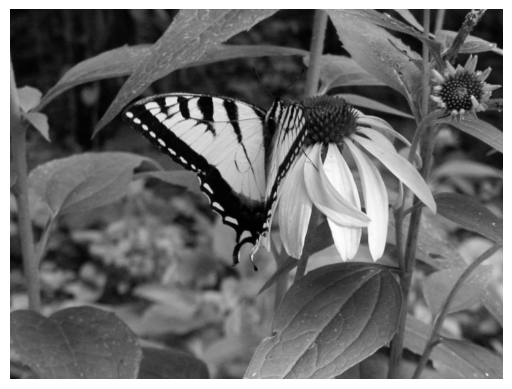

In [49]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
image_data=pi5.asdf_load_images(base_image_file)
im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]
imshow(im1,cmap=cm.gray)
axis('off')

savefig('Notes/2024-05-11 Making Masks - image.png',bbox_inches='tight', transparent=True)

len(image_data['im'])

1.4709697108415352 98.70908674753949 38.14275430749472


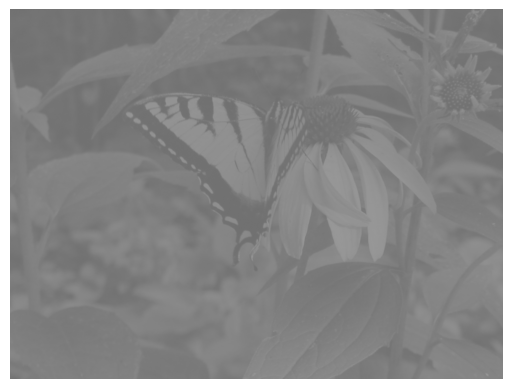

In [51]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
image_data=pi5.asdf_load_images(base_image_file)
im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]

print(im1.min(),im1.max(),im1.mean())

offset=320
imshow(im1,cmap=cm.gray,vmin=im1.mean()-offset,vmax=im1.mean()+offset)
axis('off')

savefig('Notes/2024-05-11 Making Masks - image contrast.png',bbox_inches='tight', transparent=True)


In [52]:
RR={}
for fsig in [10,30,50,70,90]:
    f=gaussian2d(x,y,mx//2,my//2,fsig)
    #f=f[(my//2-3*fsig):(my//2+3*fsig),(mx//2-3*fsig):(mx//2+3*fsig)]
    f=f[(my//2-200):(my//2+200),(mx//2-200):(mx//2+200)]
    
    res=convolve2d(g,f,mode='same')
    res=res/res.max()

    RR[fsig]=res
    print(fsig,"::",pixel2deg(fsig))



10 :: 0.9090909090909091
30 :: 2.727272727272727
50 :: 4.545454545454546
70 :: 6.363636363636363
90 :: 8.181818181818182


In [53]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 14,              # Base font size
    'axes.titlesize': 18,         # Axes title
    'axes.labelsize': 16,         # X and Y axis labels
    'xtick.labelsize': 14,        # X tick labels
    'ytick.labelsize': 14,        # Y tick labels
    'figure.titlesize': 20        # Figure title
})

Actual masks:  N,o,t,e,s,/,m,a,s,k,_,1,0,_,i,m,F,.,p,n,g
Mask Notes/mask_10_imF.png (applied to average)
 [#############################100% (ETA: 0.0 s)#############################]
Norm 0.0,1.0
 [#############################100% (ETA: 0.0 s)#############################]
Dog 1,3: 600x800 --> 570x770
 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_f1b02bbd5d9d20513f9c2a552f83fc3d.asdf...done.
Actual masks:  N,o,t,e,s,/,m,a,s,k,_,1,0,_,i,m,A,.,p,n,g
Mask Notes/mask_10_imA.png (applied to average)
 [#############################100% (ETA: 0.0 s)#############################]
Norm 0.0,1.0
 [#############################100% (ETA: 0.0 s)#############################]
Dog 1,3: 600x800 --> 570x770
 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_c9d7d47d442fcfc0e774d98812c9d4c7.asdf...done.
Actual masks:  N,o,t,e,s,/,m,a,s,k,_,3,0,_,i,m,F,.,p,n,g
Mask Notes/mask_3

/Users/bblais/tmp/ipykernel_38981/2245478481.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure()


Actual masks:  N,o,t,e,s,/,m,a,s,k,_,5,0,_,i,m,F,.,p,n,g
Mask Notes/mask_50_imF.png (applied to average)
 [#############################100% (ETA: 0.0 s)#############################]
Norm 0.0,1.0
 [#############################100% (ETA: 0.0 s)#############################]
Dog 1,3: 600x800 --> 570x770
 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_129125d26f3cb63259ae252a7326bd52.asdf...done.
Actual masks:  N,o,t,e,s,/,m,a,s,k,_,5,0,_,i,m,A,.,p,n,g
Mask Notes/mask_50_imA.png (applied to average)
 [#############################100% (ETA: 0.0 s)#############################]
Norm 0.0,1.0
 [#############################100% (ETA: 0.0 s)#############################]
Dog 1,3: 600x800 --> 570x770
 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_9821e265840b8cb1623e3444e967fa19.asdf...done.
Actual masks:  N,o,t,e,s,/,m,a,s,k,_,7,0,_,i,m,F,.,p,n,g
Mask Notes/mask_7

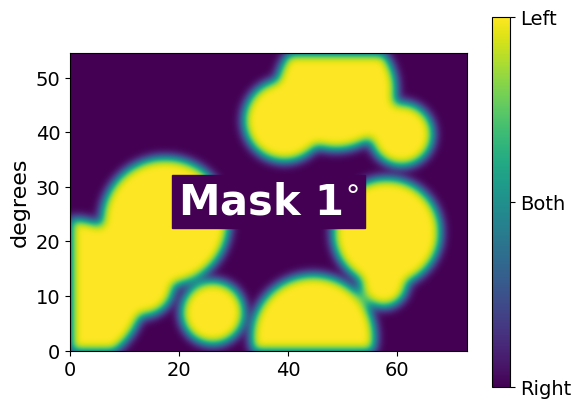

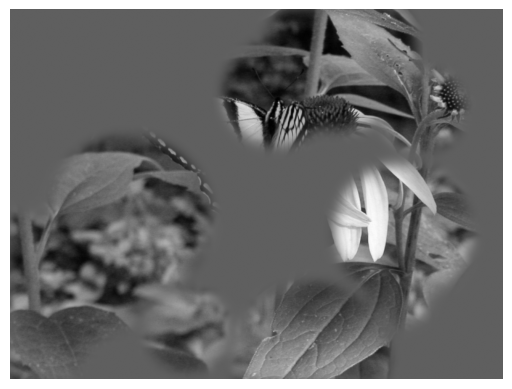

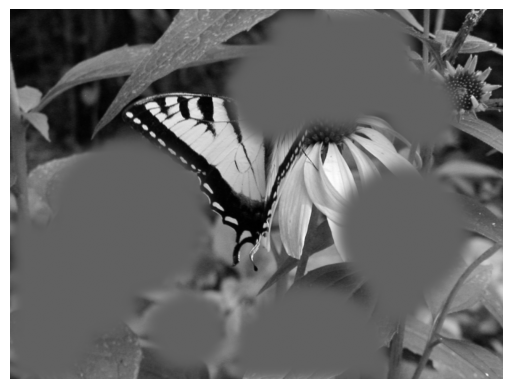

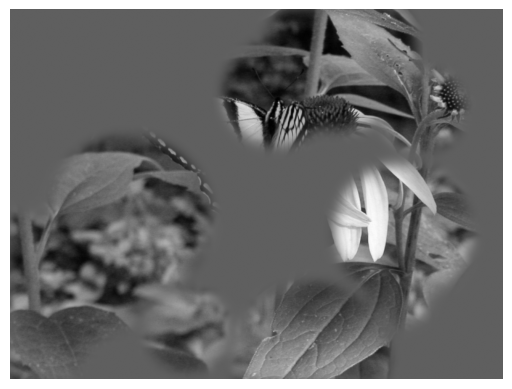

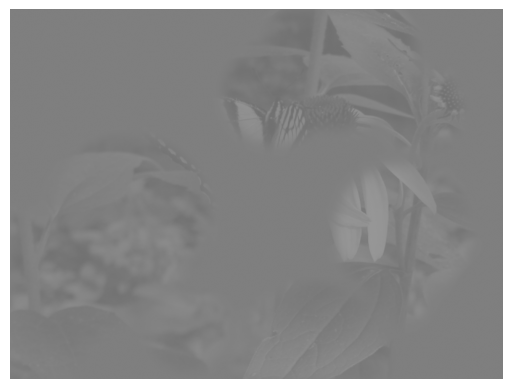

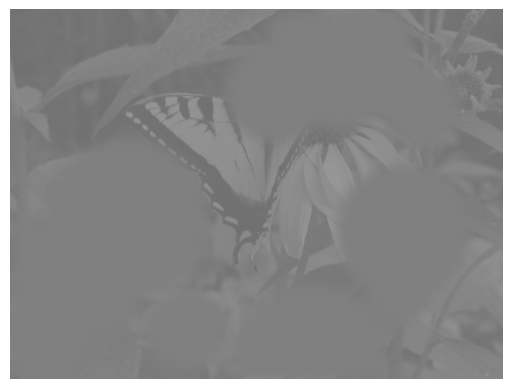

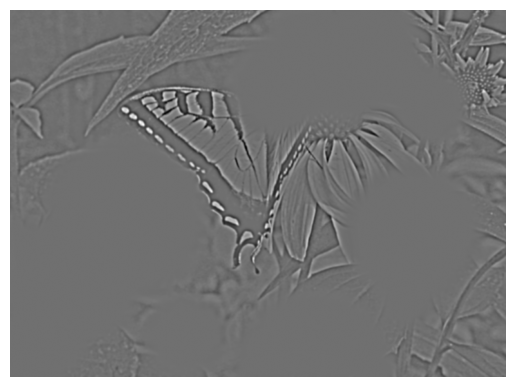

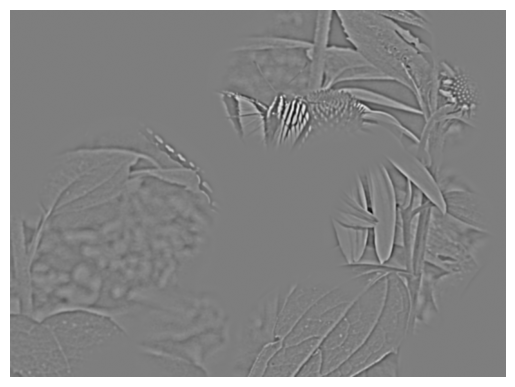

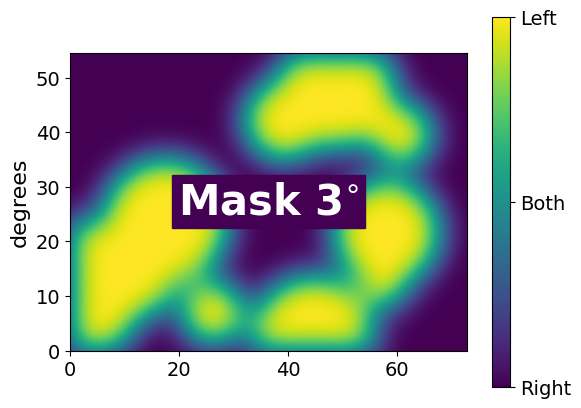

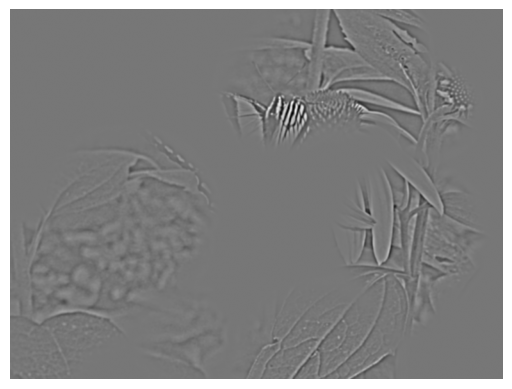

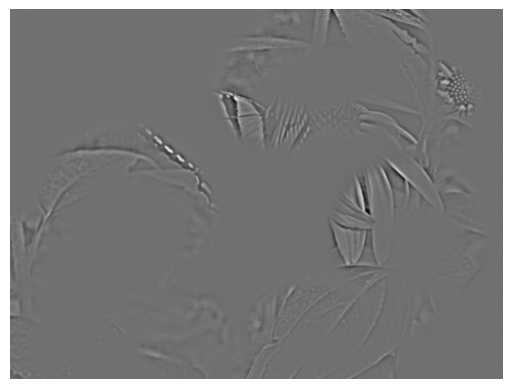

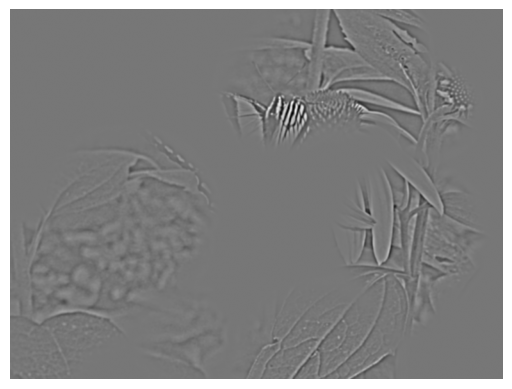

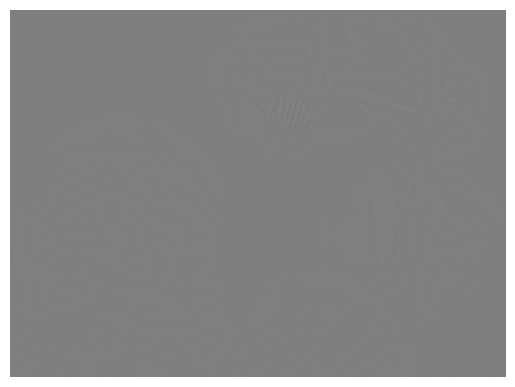

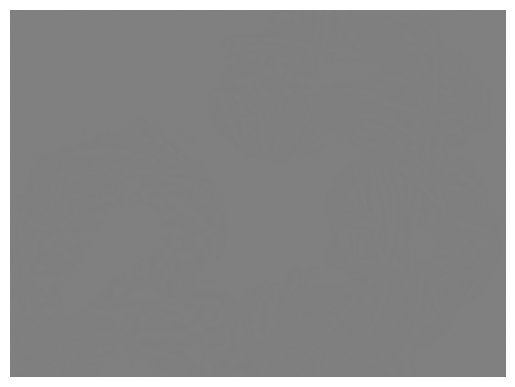

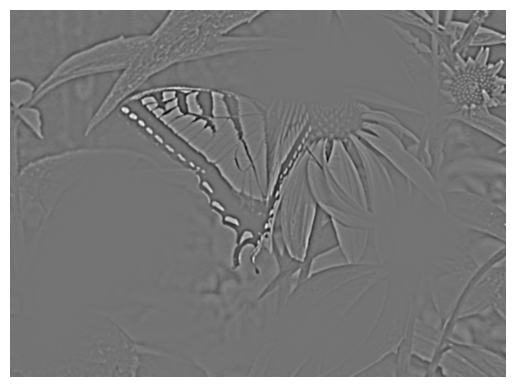

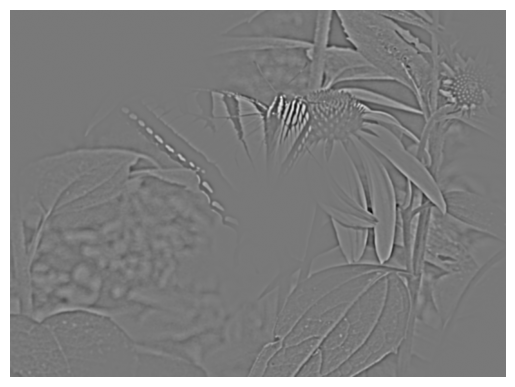

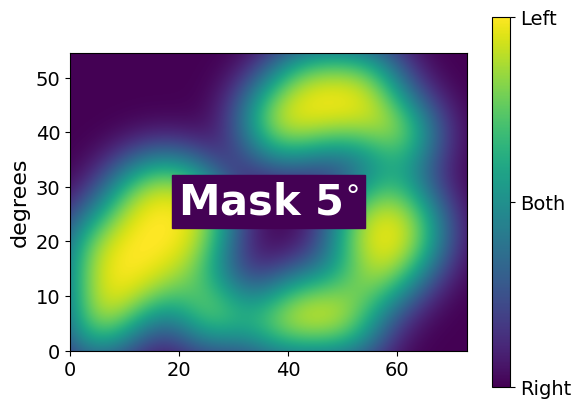

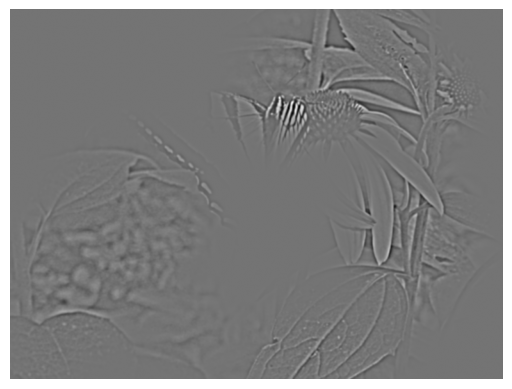

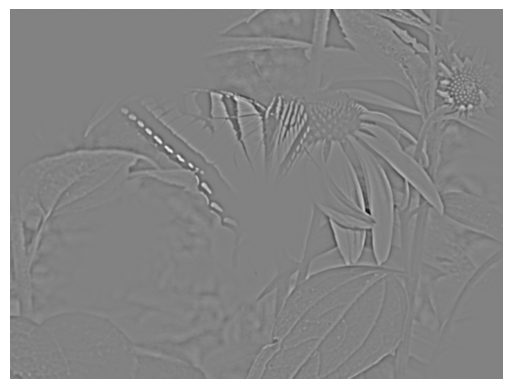

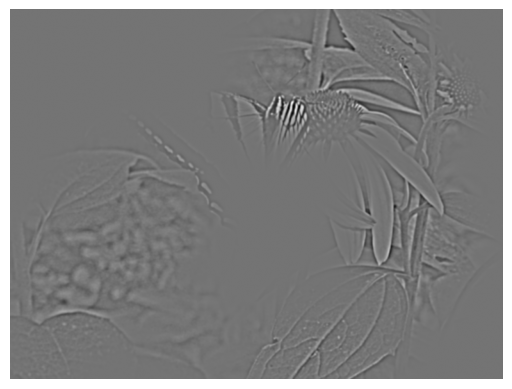

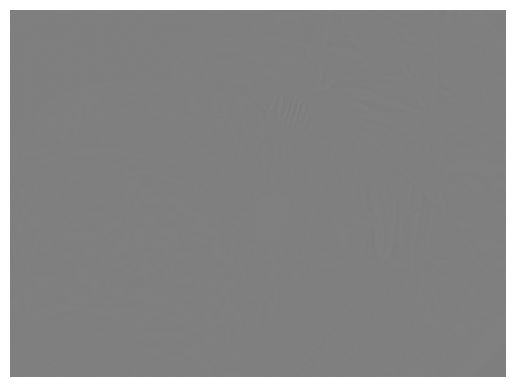

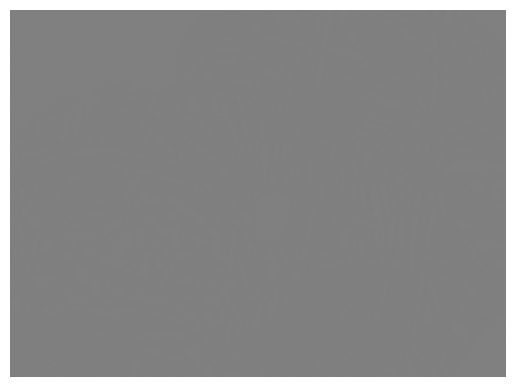

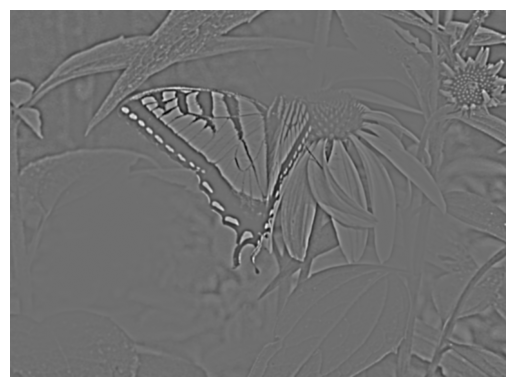

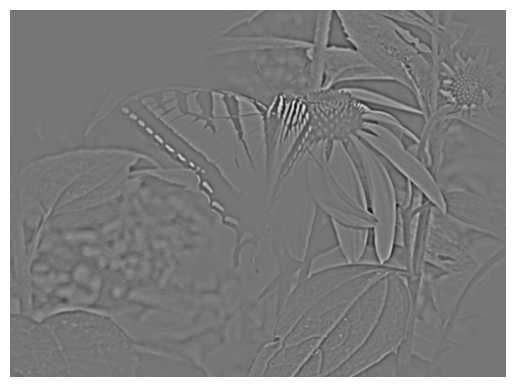

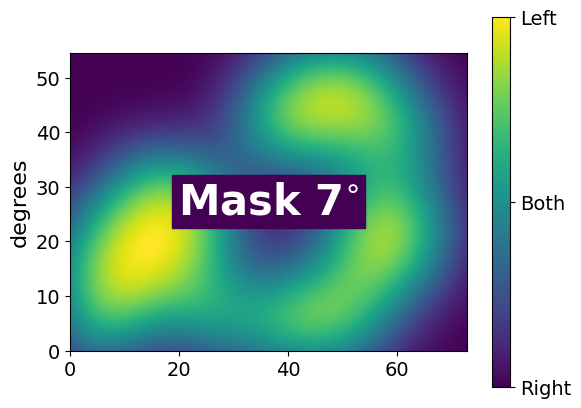

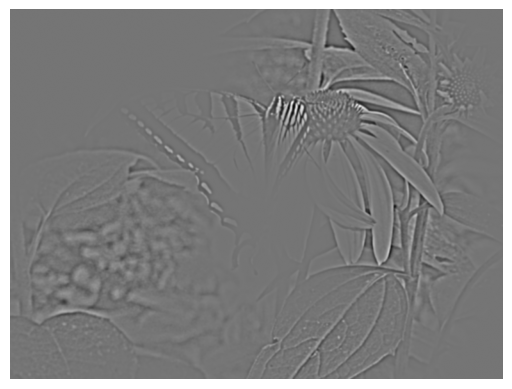

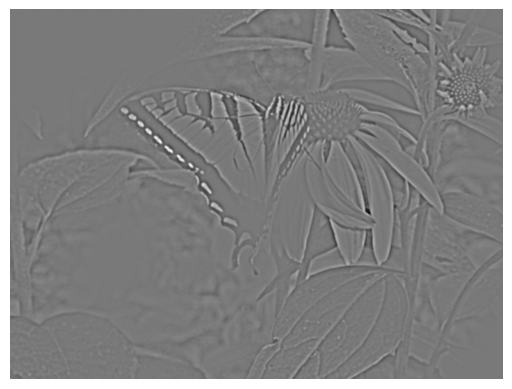

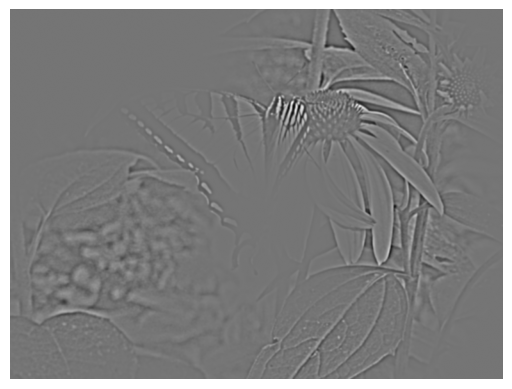

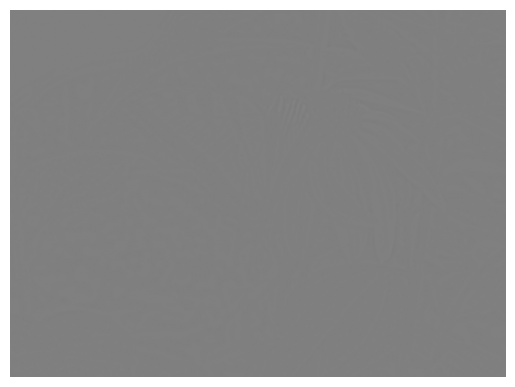

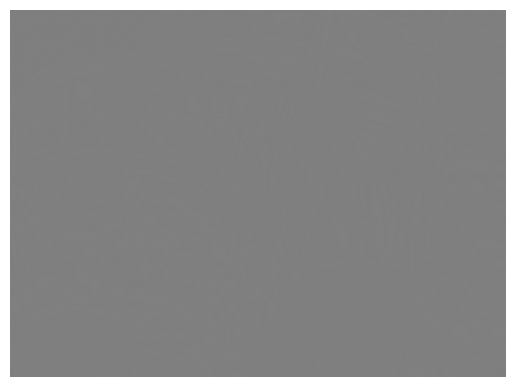

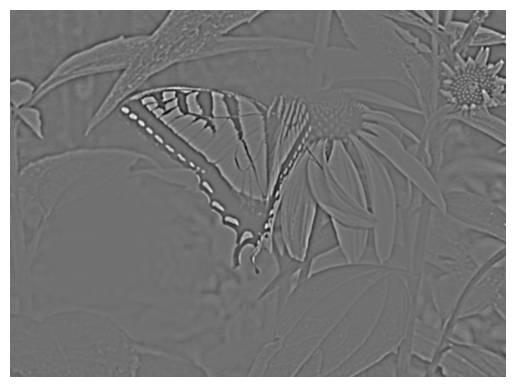

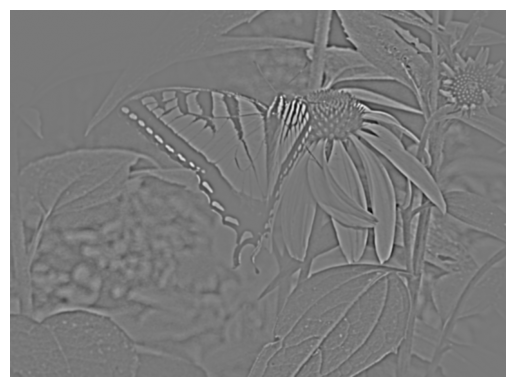

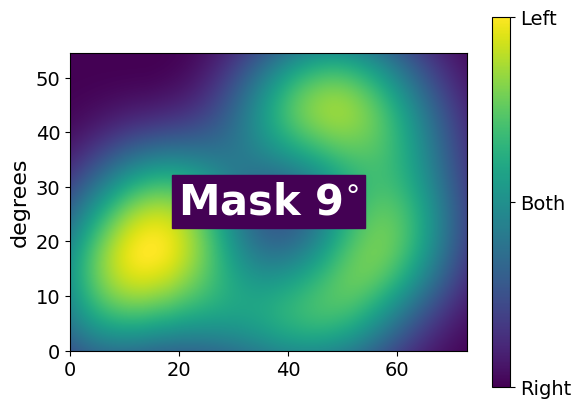

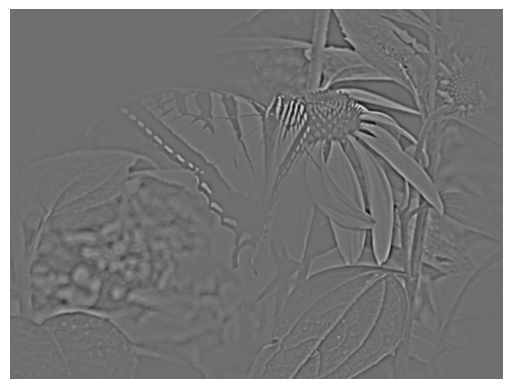

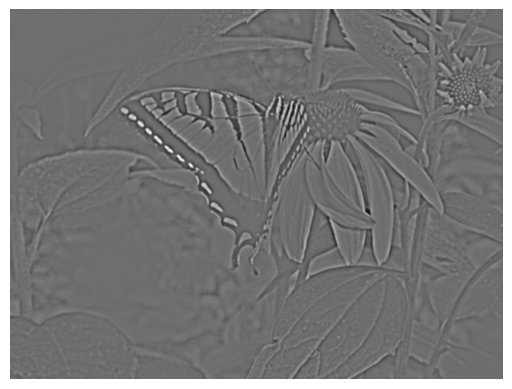

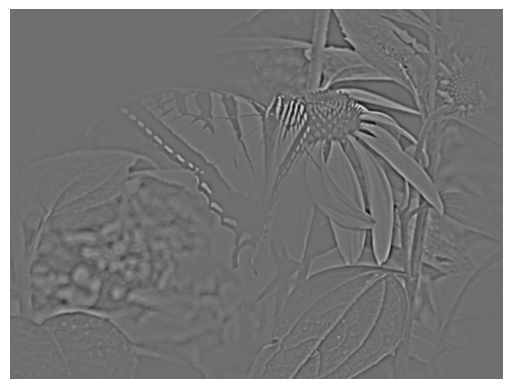

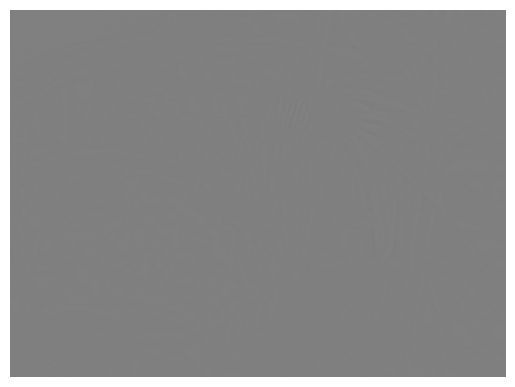

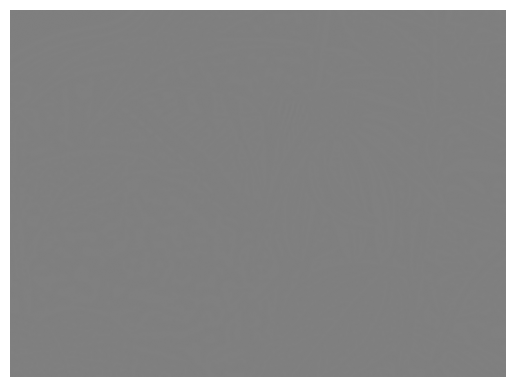

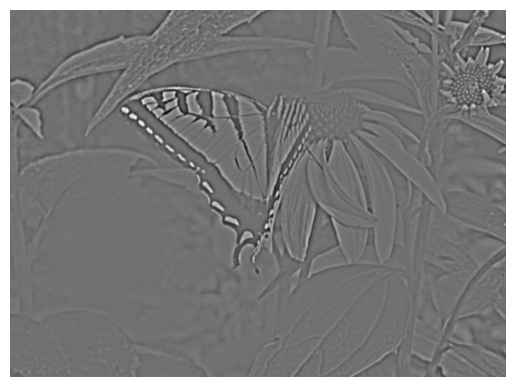

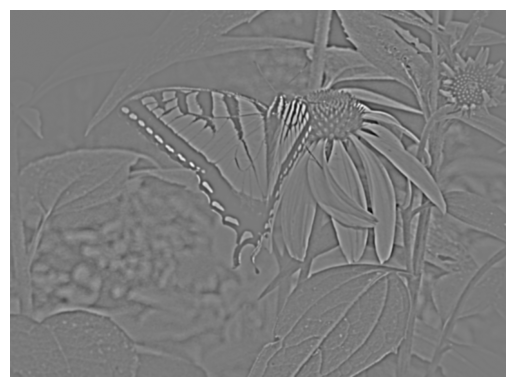

In [68]:
for fsig in RR:
    res=RR[fsig]
    
    figure()
    imshow(res,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    ylabel('degrees')
    ax=gca()
    text(0.5,0.5,f'Mask {fsig//10}'+r'$^{\circ}$',ha='center',va='center',color='white',fontsize=30,
         fontweight='bold',
        transform=ax.transAxes,
        backgroundcolor=cm.viridis(0))
    
    ax=colorbar()
    rmin,rmax=res.min(),res.max()
    ax.set_ticks([rmin,(rmin+rmax)/2,rmax])
    ax.set_ticklabels(['Right','Both','Left'])

    plt.savefig(f'Notes/2024-05-11 Making Masks - mask{fsig}.pdf',bbox_inches='tight', transparent=True)


    average_image=im1.mean()*ones_like(im1)
    AA=np.uint8(cm.viridis(res)*255)
    AA[:,:,3]=res*255
    FF=np.uint8(cm.viridis(1-res)*255)
    FF[:,:,3]=(1-res)*255

    im=Image.fromarray(AA)    
    fname='Notes/mask_%d_imA.png' % fsig
    im.save(fname)

    im=Image.fromarray(FF)    
    fname='Notes/mask_%d_imF.png' % fsig
    im.save(fname)



    
    A=AA
    r,c=0,0
    alpha_A=A[(0+r):(im1.shape[0]+r),(0+c):(im1.shape[1]+c),3]/255
    im2A=im1*alpha_A+(average_image*(1-alpha_A))
    
    F=FF
    r,c=0,0
    alpha_F=F[(0+r):(im1.shape[0]+r),(0+c):(im1.shape[1]+c),3]/255
    im2F=im1*alpha_F+(average_image*(1-alpha_F))
    
    figure()
    imshow(im2A,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    xlabel('degrees')
    ylabel('degrees')
    axis('off')
    #title('Left')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} A.png',bbox_inches='tight', transparent=True)
    imsave('Notes/image_mask_%d_imA.png' % fsig,im2A,cmap=cm.gray)
    
    figure()
    imshow(im2F,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    axis('off')
    xlabel('degrees')
    ylabel('degrees')
    #title('Right')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} F.png',bbox_inches='tight', transparent=True)
    imsave('Notes/image_mask_%d_imF.png' % fsig,im2F,cmap=cm.gray)


    figure()
    imshow(im2A,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    axis('off')
    xlabel('degrees')
    ylabel('degrees')
    #title('Right')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} A.png',bbox_inches='tight', transparent=True)
    imsave('Notes/image_mask_%d_imA.png' % fsig,im2A,cmap=cm.gray)

    figure()
    offset=320
    imshow(im2A,cmap=cm.gray,vmin=im2A.mean()-offset,vmax=im2A.mean()+offset)
    axis('off')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} A contrast.png',bbox_inches='tight', transparent=True)
    imsave('Notes/mask_%d_imA_contrast.png' % fsig,im2A,cmap=cm.gray,vmin=im2A.mean()-offset,vmax=im2A.mean()+offset)

    figure()
    offset=320
    imshow(im2F,cmap=cm.gray,vmin=im2F.mean()-offset,vmax=im2F.mean()+offset)
    axis('off')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} F contrast.png',bbox_inches='tight', transparent=True)
    imsave('Notes/mask_%d_imF_contrast.png' % fsig,im2F,cmap=cm.gray,vmin=im2F.mean()-offset,vmax=im2F.mean()+offset)


    full_Fmask_name='Notes/mask_%d_imF.png' % fsig
    full_Amask_name='Notes/mask_%d_imA.png' % fsig

    mask_name='F'
    imfname=pi5.filtered_images(base_image_file,
                                            {'type':'mask',
                                             'name':full_Fmask_name, 
                                            'seed':101,'apply_to_average':True},
                                            {'type':'norm'},
                                            {'type':'dog','sd1':1,'sd2':3},   
                                            verbose=True,
                                             )
    image_data=pi5.asdf_load_images(imfname)
    im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]
    figure()
    imshow(im1,cmap=cm.gray)
    axis('off')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} F dog.png',bbox_inches='tight', transparent=True)
    imsave('Notes/image_mask_%d_imF_dog.png' % fsig,im1,cmap=cm.gray)

    mask_name='A'
    imfname=pi5.filtered_images(base_image_file,
                                            {'type':'mask',
                                             'name':full_Amask_name, 
                                            'seed':101,'apply_to_average':True},
                                            {'type':'norm'},
                                            {'type':'dog','sd1':1,'sd2':3},   
                                            verbose=True,
                                             )
    image_data=pi5.asdf_load_images(imfname)
    im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]
    figure()
    imshow(im1,cmap=cm.gray)
    axis('off')
    plt.savefig(f'Notes/2024-05-11 Making Masks - image mask{fsig} A dog.png',bbox_inches='tight', transparent=True)
    imsave('Notes/image_mask_%d_imA_dog.png' % fsig,im1,cmap=cm.gray)



Text(0.5, 1.0, '(600, 800, 4)')

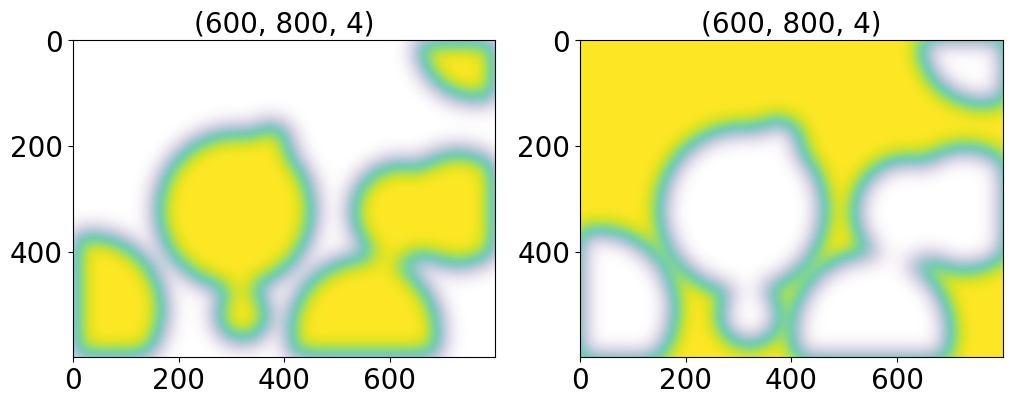

In [ ]:
res=res[:600,:800]
figure(figsize=(12,8))
subplot(1,2,1)

AA=np.uint8(cm.viridis(res)*255)
AA[:,:,3]=res*255
im=Image.fromarray(AA)  
imshow(im)
title(AA.shape)

subplot(1,2,2)

FF=np.uint8(cm.viridis(1-res)*255)
FF[:,:,3]=(1-res)*255
im=Image.fromarray(FF)  
imshow(im)
title(FF.shape)



In [ ]:
import process_images_hdf5 as pi5

In [ ]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
image_data=pi5.asdf_load_images(base_image_file)

(98.70908674753949, 20.459749851369903)

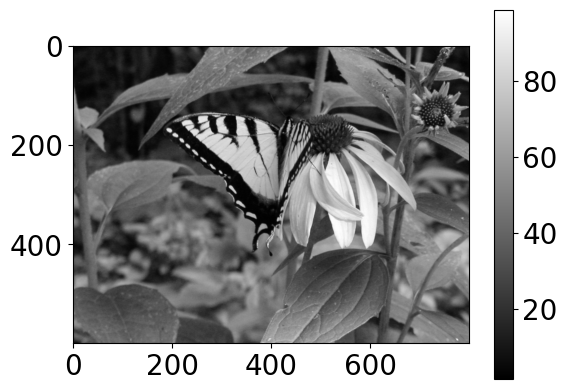

In [ ]:
im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]
imshow(im1,cmap=cm.gray)
colorbar()
im1.max(),im1.std()

<matplotlib.colorbar.Colorbar>

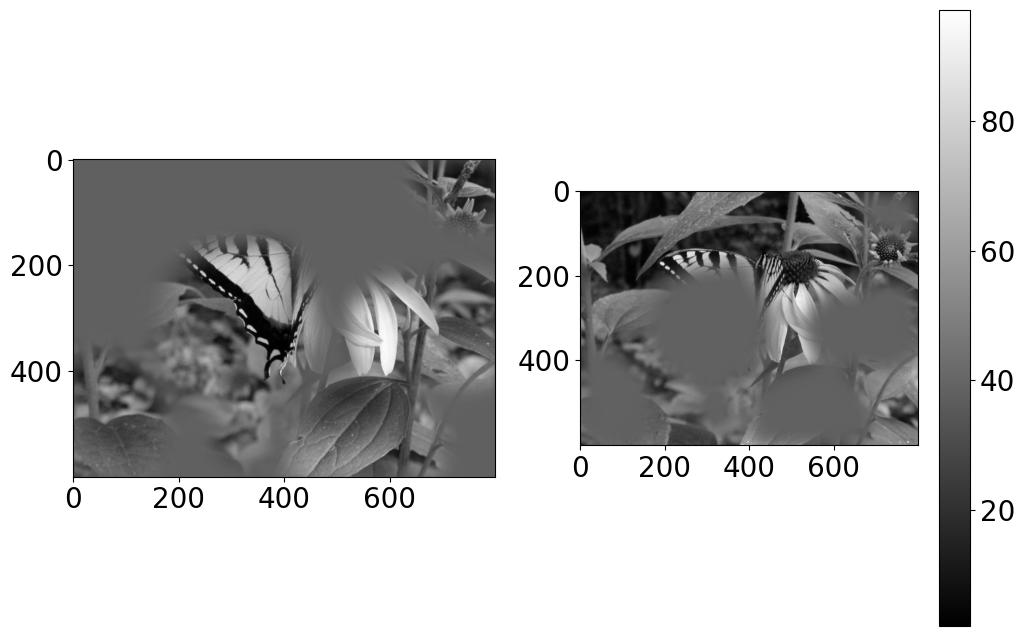

In [ ]:
figure(figsize=(12,8))
subplot(1,2,1)

average_image=im1.mean()*ones_like(im1)



A=AA
r,c=0,0
alpha_A=A[(0+r):(im1.shape[0]+r),(0+c):(im1.shape[1]+c),3]/255
im2=im1*alpha_A+(average_image*(1-alpha_A))
imshow(im2,cmap=cm.gray)


subplot(1,2,2)

F=FF
r,c=0,0
alpha_F=F[(0+r):(im1.shape[0]+r),(0+c):(im1.shape[1]+c),3]/255
im2=im1*alpha_F+(average_image*(1-alpha_F))
imshow(im2,cmap=cm.gray)
colorbar()

In [ ]:
from bigfonts import *
from IPython.display import HTML

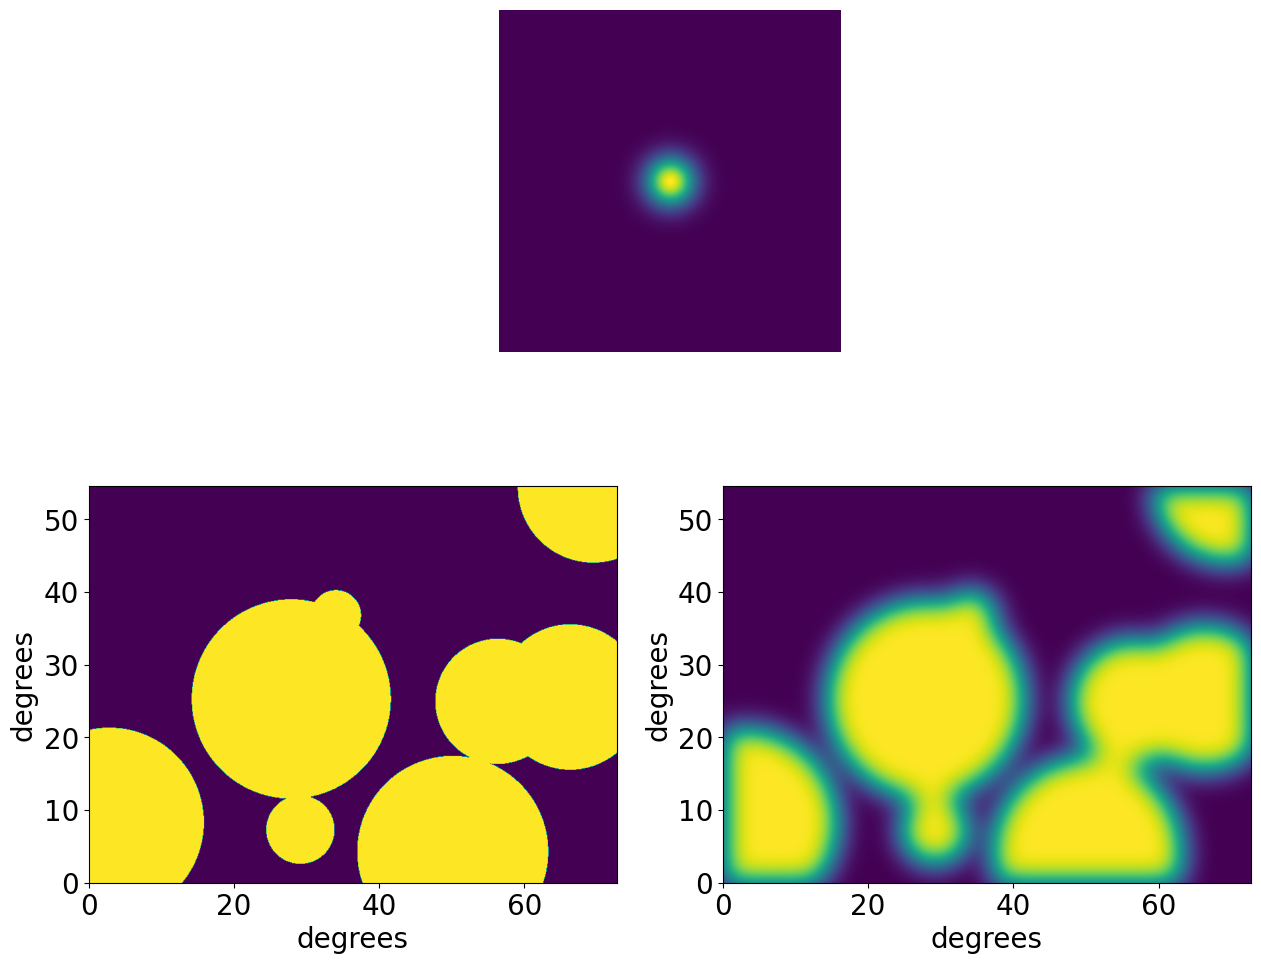

In [ ]:
figure(figsize=(15,12))
subplot(2,3,2)
imshow(f,extent=[0,pixel2deg(f.shape[1]),0,pixel2deg(f.shape[0])])
axis('off')
subplot(2,2,3)
imshow(g,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
xlabel('degrees')
ylabel('degrees')

subplot(2,2,4)

imshow(res,extent=[0,pixel2deg(res.shape[1]),0,pixel2deg(res.shape[0])])
xlabel('degrees')
ylabel('degrees')

savefig('blob_convolution_example_fsig_%d.pdf' % fsig)


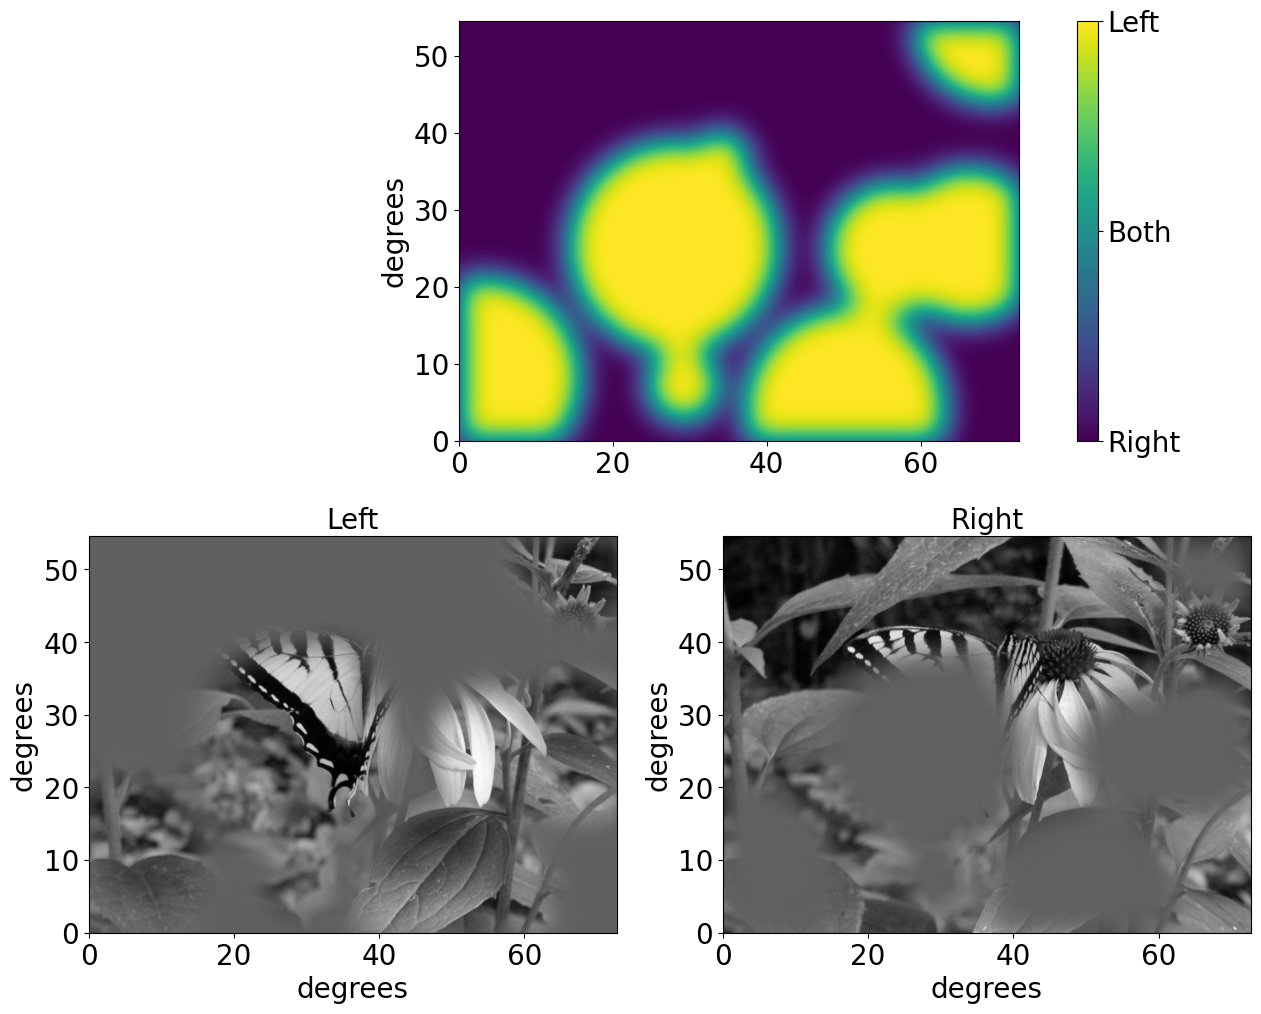

In [ ]:
figure(figsize=(15,12))
subplot(2,1,1)
imshow(res,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
ylabel('degrees')
ax=colorbar()
rmin,rmax=res.min(),res.max()
ax.set_ticks([rmin,(rmin+rmax)/2,rmax])
ax.set_ticklabels(['Right','Both','Left'])

subplot(2,2,3)
im2=im1*alpha_A+(average_image*(1-alpha_A))
imshow(im2,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
xlabel('degrees')
ylabel('degrees')
title('Left')

subplot(2,2,4)
im2=im1*alpha_F+(average_image*(1-alpha_F))
imshow(im2,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
xlabel('degrees')
ylabel('degrees')
title('Right')

savefig('mask_filter_example_fsig_%d.pdf' % fsig)


In [ ]:
masks={}
for f,fsig in enumerate([10,30,50,70,90,110]):
    res=make_mask(fsig,g)
    masks[fsig]=res

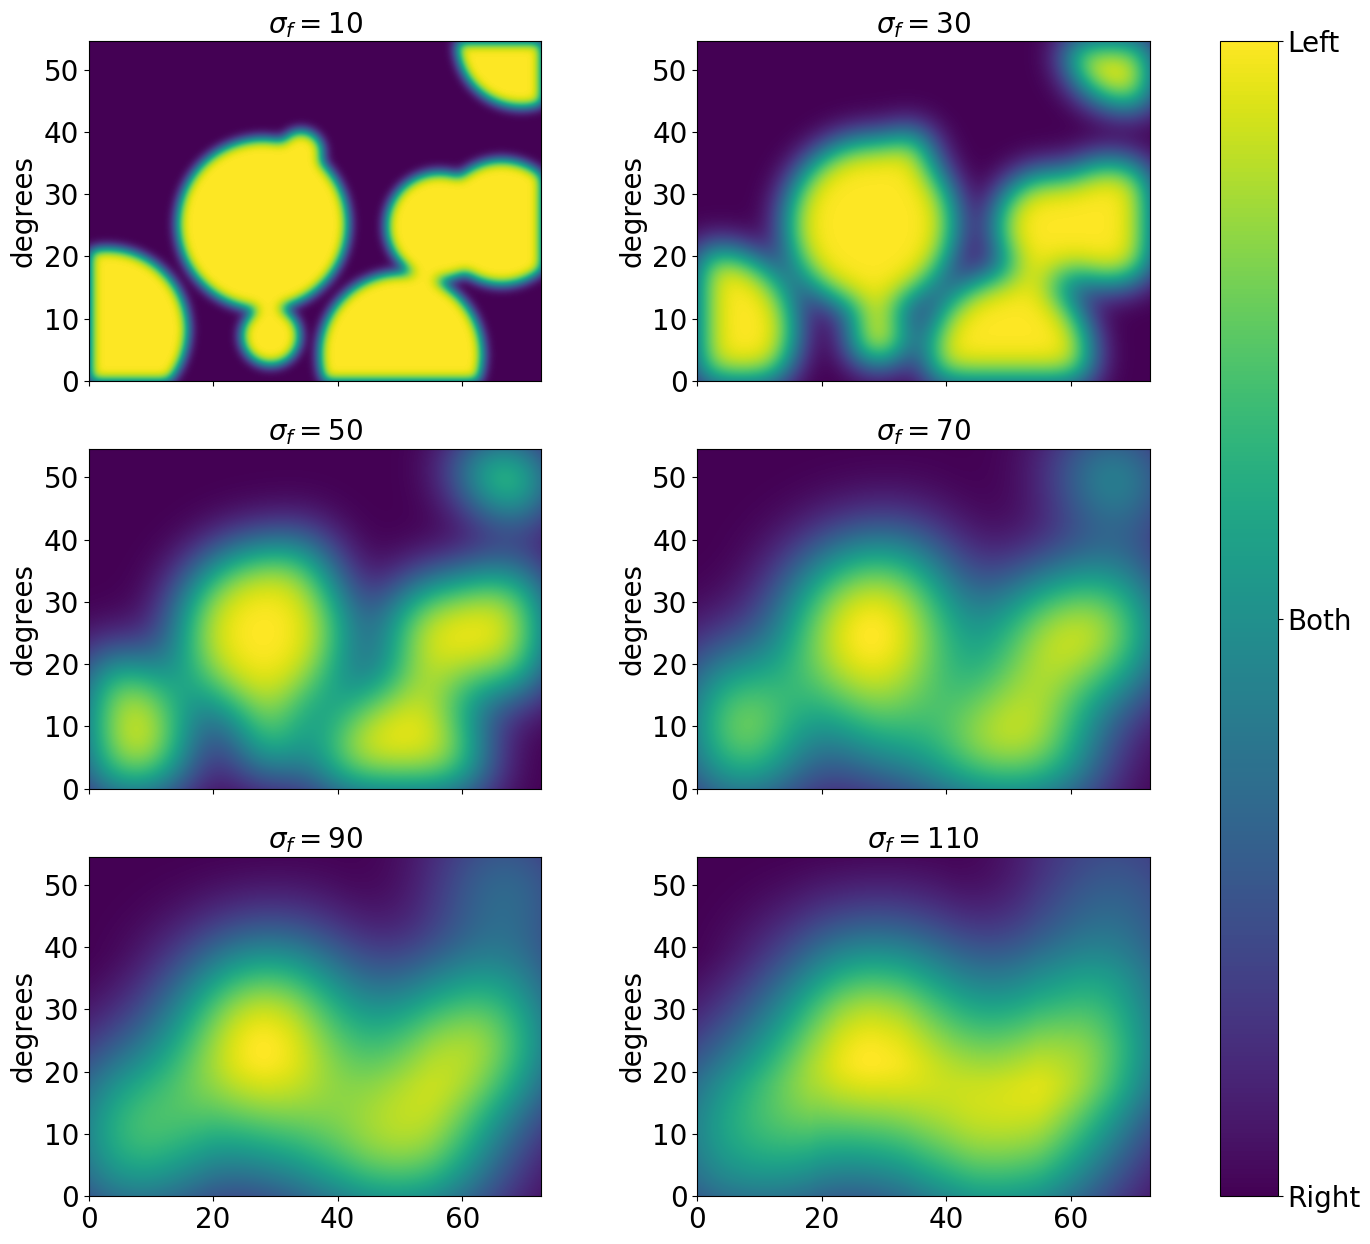

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(18,15))

for f,fsig in enumerate([10,30,50,70,90,110]):
    ax = axs.ravel()[f]

    res=masks[fsig]
    im=ax.imshow(res,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    ax.set_ylabel('degrees')
    ax.set_title(r"$\sigma_f=%g$" % fsig)
    
    if fsig in [10,30,50,70]:
        ax.set_xticklabels([])
    
h=fig.colorbar(im, ax=axs)
rmin,rmax=res.min(),res.max()
h.set_ticks([rmin,(rmin+rmax)/2,rmax])
h.set_ticklabels(['Right','Both','Left'])
savefig('mask_filter_examples_fsigs.pdf')

In [ ]:
raise ValueError

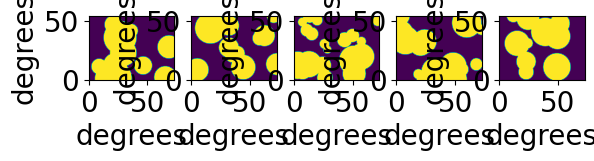

In [ ]:
gs=[]
for k in range(5):
    g=0


    blob_deg_min=3
    blob_deg_max=14
    percentage_covered=0
    while percentage_covered<50:
        g=g+circle(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))
        g=g>0
        percentage_covered=g.sum()/prod(g.shape)*100
    #    g=g+gaussian2d(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))>.5

    gs.append(g)
    
    subplot(1,5,k+1)
    imshow(g,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    xlabel('degrees')
    ylabel('degrees')

In [ ]:
g.sum()/prod(g.shape)*100

51.867291666666674

bblais-masks-20240511/2024-05-11-A-A-fsig10.png
bblais-masks-20240511/2024-05-11-A-F-fsig10.png
bblais-masks-20240511/2024-05-11-B-A-fsig10.png
bblais-masks-20240511/2024-05-11-B-F-fsig10.png
bblais-masks-20240511/2024-05-11-C-A-fsig10.png
bblais-masks-20240511/2024-05-11-C-F-fsig10.png
bblais-masks-20240511/2024-05-11-D-A-fsig10.png
bblais-masks-20240511/2024-05-11-D-F-fsig10.png
bblais-masks-20240511/2024-05-11-E-A-fsig10.png
bblais-masks-20240511/2024-05-11-E-F-fsig10.png
bblais-masks-20240511/2024-05-11-A-A-fsig30.png
bblais-masks-20240511/2024-05-11-A-F-fsig30.png
bblais-masks-20240511/2024-05-11-B-A-fsig30.png
bblais-masks-20240511/2024-05-11-B-F-fsig30.png
bblais-masks-20240511/2024-05-11-C-A-fsig30.png
bblais-masks-20240511/2024-05-11-C-F-fsig30.png
bblais-masks-20240511/2024-05-11-D-A-fsig30.png
bblais-masks-20240511/2024-05-11-D-F-fsig30.png
bblais-masks-20240511/2024-05-11-E-A-fsig30.png
bblais-masks-20240511/2024-05-11-E-F-fsig30.png
bblais-masks-20240511/2024-05-11-A-A-fsi

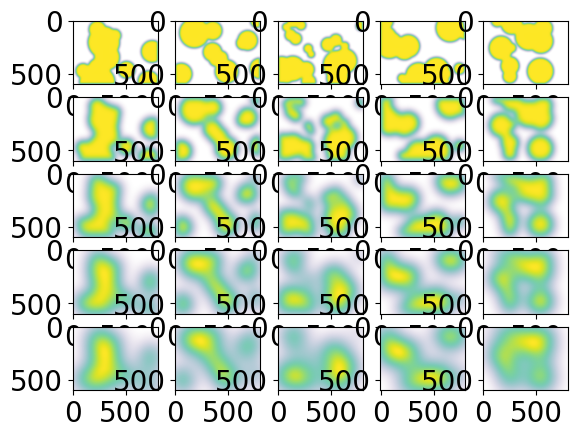

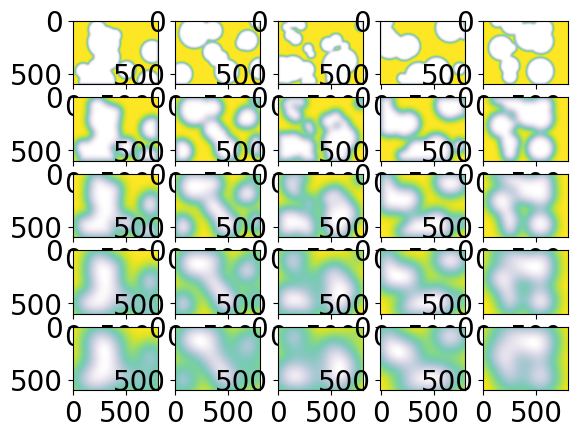

In [ ]:
count=1
for f,fsig in enumerate([10,30,50,70,90]):
    for k in range(5):
        res=make_mask(fsig,gs[k])

        AA=np.uint8(cm.viridis(res)*255)
        AA[:,:,3]=res*255

        FF=np.uint8(cm.viridis(1-res)*255)
        FF[:,:,3]=(1-res)*255

        im=Image.fromarray(AA)    
        fname='bblais-masks-20240511/2024-05-11-%c-A-fsig%2d.png' % (k+65,fsig)
        im.save(fname)
        print(fname)

        figure(1)
        subplot(5,5,count)
        imshow(im)

        im=Image.fromarray(FF)    
        fname='bblais-masks-20240511/2024-05-11-%c-F-fsig%2d.png' % (k+65,fsig)
        im.save(fname)
        print(fname)

        figure(2)
        subplot(5,5,count)
        imshow(im)
    
        count+=1